# 数据处理

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import aquarel

from ssh2swh import ssh2sse, ssh2wp, sse2swh

In [2]:
theme = aquarel.load_theme('boxy_dark')
theme.apply()

## VEL

### 1号浮标

In [3]:
fb1ks = pd.read_csv('FG1PPK_ssh.txt', delim_whitespace=True)

In [4]:
fb1kv = np.diff(fb1ks['ssh'])

In [5]:
fb1tv = pd.read_csv('ghfb190901.pos', comment='%')

In [6]:
fb1tv.columns

Index(['   GPST                ', ' latitude(deg)', 'longitude(deg)',
       ' height(m)', '  Q', ' ns', '  sdn(m)', '  sde(m)', '  sdu(m)',
       ' sdne(m)', ' sdeu(m)', ' sdun(m)', 'age(s)', ' ratio', '   vn(m/s)',
       '   ve(m/s)', '   vu(m/s)', '     sdvn', '    sdve', '    sdvu',
       '   sdvne', '   sdveu', '   sdvun'],
      dtype='object')

In [7]:
fb1tv = fb1tv['   vu(m/s)']

In [8]:
len(fb1kv), len(fb1tv)

(86399, 86400)

### 2 号浮标

In [9]:
fb2ks = pd.read_csv('FG2PPK_ssh.txt', delim_whitespace=True)

In [10]:
fb2kv = np.diff(fb2ks['ssh'])

In [11]:
fb2tv = pd.read_csv('mdfb190901.pos', comment='%')

In [12]:
fb2tv = fb2tv['   vu(m/s)']

## SSH

### 1 号浮标

In [13]:
fb1ks = fb1ks['ssh']

In [14]:
fb1ts = np.cumsum(fb1tv)

In [15]:
len(fb1ks), len(fb1ts)

(86400, 86400)

### 2 号浮标

In [16]:
fb2ks = fb2ks['ssh']

In [17]:
fb2ts = np.cumsum(fb2tv)

In [18]:
len(fb2ks), len(fb2ts)

(86400, 86400)

## SSE

### 1 号浮标

In [19]:
fb1ke = ssh2sse(fb1ks, 2, 120, 1)
fb1te = ssh2sse(fb1ts, 2, 120, 1)

### 2 号浮标

In [20]:
fb2ke = ssh2sse(fb2ks, 2, 120, 1)
fb2te = ssh2sse(fb2ts, 2, 120, 1)

## SWH

计算 SWH，每半小时计算一个

### 1 号浮标

In [21]:
fb1kw, fb1tw = [], []
for start in range(0, 86400, 1800):
    fb1kw.append(np.std(fb1ke[start:start+1800]) * 4)
    fb1tw.append(np.std(fb1te[start:start+1800]) * 4)

fb1kw, fb1tw = np.array(fb1kw), np.array(fb1tw)

In [22]:
t2 = np.arange(48) / 2 + 1.5

In [23]:
tk2 = [f'{i}' for i in range(1, 24, 4)] + ['1']

### 2 号浮标

In [24]:
fb2kw, fb2tw = [], []
for start in range(0, 86400, 1800):
    fb2kw.append(np.std(fb2ke[start:start+1800]) * 4)
    fb2tw.append(np.std(fb2te[start:start+1800]) * 4)

fb2kw, fb2tw = np.array(fb2kw), np.array(fb2tw)

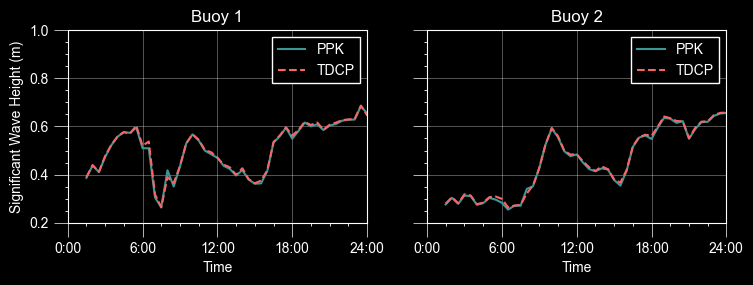

In [25]:
plt.figure(figsize=(8.5, 2.5))

plt.subplot(1, 2, 1)
# plt.plot(t2, fb1dw, '-', label='DOP')
plt.plot(t2, fb1kw, '-', label='PPK')
plt.plot(t2, fb1tw, '--', label='TDCP')
plt.xlim(0, 24)
plt.ylim(0.2, 1)
plt.xticks(np.arange(0, 25, 6), labels=['0:00', '6:00', '12:00', '18:00', '24:00'])
plt.yticks(np.arange(0.2, 1.1, 0.2))
plt.xlabel('Time')
plt.ylabel('Significant Wave Height (m)')
plt.title('Buoy 1')
plt.legend()

plt.subplot(1, 2, 2)
# plt.plot(t2, fb2dw, '-', label='DOP')
plt.plot(t2, fb2kw, '-', label='PPK')
plt.plot(t2, fb2tw, '--', label='TDCP')
plt.xlim(0, 24)
plt.ylim(0.2, 1)
plt.xticks(np.arange(0, 25, 6), labels=['0:00', '6:00', '12:00', '18:00', '24:00'])
plt.yticks(np.arange(0.2, 1.1, 0.2), labels=[])
plt.xlabel('Time')
plt.title('Buoy 2')
plt.legend()

plt.show()

### 山仪所加速度计浮标

In [26]:
sys = pd.read_csv('shanyisuo.txt', delim_whitespace=True)

In [27]:
sysw = sys['swh'].values
sysp = sys['wp'].values

In [28]:
len(sys)

25

In [29]:
t3 = np.arange(25) + 1

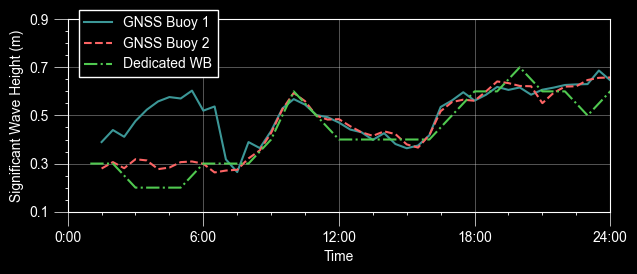

In [30]:
plt.figure(figsize=[7, 2.5])
plt.plot(t2, fb1tw, '-', label='GNSS Buoy 1')
plt.plot(t2, fb2tw, '--', label='GNSS Buoy 2')
plt.plot(t3, sysw, '-.',  label='Dedicated WB')
plt.xlabel('Time')
plt.ylabel('Significant Wave Height (m)')
plt.xticks(np.arange(0, 25, 6), labels=['0:00', '6:00', '12:00', '18:00', '24:00'])
plt.yticks(np.arange(0.1, 0.91, 0.2))
plt.xlim(0, 24)
plt.ylim(0.1, 0.9)
plt.legend(loc=[0.02, 0.7], framealpha=1)

# plt.savefig('../assets/fb1-fb2-dwb-swh.pdf', format='pdf', bbox_inches='tight')
plt.show()

### 技术指标统计

#### BIAS

PPK vs TDCP

In [31]:
np.mean(fb1kw - fb1tw), np.mean(fb2kw - fb2tw)

(-0.003562050541195175, -0.003744159344501709)

DWB vs TDCP

In [32]:
np.mean(sysw[1:] - fb2tw[0::2])

-0.019276508420922614

TDCP 1 vs TDCP 2

In [33]:
np.mean(fb1tw[11:] - fb2tw[11:])

-0.0002688284086448164

#### RMSE

PPK vs TDCP

In [34]:
np.sqrt(np.sum((fb1kw - fb1tw)**2)/len(fb1kw)), np.sqrt(np.sum((fb2kw - fb2tw)**2)/len(fb2kw))

(0.0079059207479156, 0.0063648184403621196)

DWB vs TDCP

In [35]:
np.sqrt(np.sum((sysw[1:] - fb2tw[0::2])**2)/len(sysw[1:]))

0.05789617845779771

TDCP 1 vs TDCP 2

In [36]:
np.sqrt(np.sum((fb1tw[11:] - fb2tw[11:])**2)/len(fb1tw[11:]))

0.024994267660436942

#### Correlation

PPK vs TDCP

In [37]:
np.corrcoef(fb1kw, fb1tw)[1, 0], np.corrcoef(fb2kw, fb2tw)[1, 0]

(0.9976455841809395, 0.9993123523938623)

DWB vs TDCP

In [38]:
np.corrcoef(sysw[1:], fb2tw[0::2])[1, 0]

0.9286866341659465

TDCP 1 vs TDCP 2

In [39]:
np.corrcoef(fb1tw[11:], fb2tw[11:])[1, 0]

0.976674004751904

## Period

In [40]:
fb1kp, fb1tp = [], []
for start in range(0, 86400, 1800):
    fb1kp.append(ssh2wp(fb1ke[start:start+1800], 1))
    fb1tp.append(ssh2wp(fb1te[start:start+1800], 1))

fb1kp, fb1tp = np.array(fb1kp), np.array(fb1tp)

In [41]:
fb2kp, fb2tp = [], []
for start in range(0, 86400, 1800):
    fb2kp.append(ssh2wp(fb2ke[start:start+1800], 1))
    fb2tp.append(ssh2wp(fb2te[start:start+1800], 1))

fb2kp, fb2tp = np.array(fb2kp), np.array(fb2tp)

In [42]:
len(fb1kp), len(fb1tp)

(48, 48)

### 统计指标

#### Bias

PPK vs TDCP

In [43]:
np.mean(fb1kp - fb1tp), np.mean(fb2kp - fb2tp)

(-0.0639194543938832, -0.07293216881484595)

DWB vs TDCP

In [44]:
np.mean(sysp[9:] - fb2tp[16::2])

0.048577135909303015

TDCP 1 vs TDCP 2

In [45]:
np.mean(fb1tp[15:] - fb2tp[15:])

0.02144337724024172

#### RMSE

PPK vs TDCP

In [46]:
np.sqrt(np.sum((fb1kp - fb1tp)**2)/len(fb1kp)), np.sqrt(np.sum((fb2kp - fb2tp)**2)/len(fb2kp))

(0.1260577671303695, 0.14065619310518354)

DWB vs TDCP

In [47]:
np.sqrt(np.sum((sysp[9:] - fb2tp[16::2])**2)/len(sysp[9:]))

0.12644862955140357

TDCP 1 vs TDCP 2

In [48]:
np.sqrt(np.sum((fb1tp[15:] - fb2tp[15:])**2)/len(fb1tp[15:]))

0.05535494227219341

#### Correlation

PPK vs TDCP

In [49]:
np.corrcoef(fb1kp, fb1tp)[1, 0], np.corrcoef(fb2kp, fb2tp)[1, 0]

(0.9937141610706585, 0.9574451444542018)

DWB vs TDCP

In [50]:
np.corrcoef(sysp[9:], fb2tp[16::2])[1, 0]

0.9330149242162743

TDCP 1 vs TDCP 2

In [51]:
np.corrcoef(fb1tp[15:], fb2tp[15:])[1, 0]

0.9879195310882066

## 统计图绘制

In [52]:
t2

array([ 1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,
        7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5, 12. ,
       12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5, 17. , 17.5,
       18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. , 22.5, 23. ,
       23.5, 24. , 24.5, 25. ])

### SWH

In [53]:
a1, b1 = np.polyfit(fb1kw, fb1tw, deg=1)
fest1 = a1 * fb1kw + b1
ferr1 = fb1kw.std() * np.sqrt(1/len(fb1kw) +
                             (fb1kw - fb1kw.mean())**2 / np.sum((fb1kw - fb1kw.mean())**2))

In [54]:
a2, b2 = np.polyfit(fb2kw, fb2tw, deg=1)
fest2 = a2 * fb2kw + b2
ferr2 = fb2kw.std() * np.sqrt(1/len(fb2kw) +
                             (fb2kw - fb2kw.mean())**2 / np.sum((fb2kw - fb2kw.mean())**2))

In [55]:
a3, b3 = np.polyfit(fb1tw[11:], fb2tw[11:], deg=1)
fest3 = a3 * fb1tw[11:] + b3
ferr3 = fb1tw[11:].std() * np.sqrt(1/len(fb1tw[11:]) +
                             (fb1tw[11:] - fb1tw[11:].mean())**2 / np.sum((fb1tw[11:] - fb1tw[11:].mean())**2))

In [56]:
a4, b4 = np.polyfit(fb2tw[0::2], sysw[1:], deg=1)
fest4 = a4 * fb2tw[0::2] + b4
ferr4 = fb2tw[0::2].std() * np.sqrt(1/len(fb2tw[0::2]) +
                             (fb2tw[0::2] - fb2tw[0::2].mean())**2 / np.sum((fb2tw[0::2] - fb2tw[0::2].mean())**2))

In [57]:
fb1kw[10:14] = np.nan
fb1tw[10:14] = np.nan

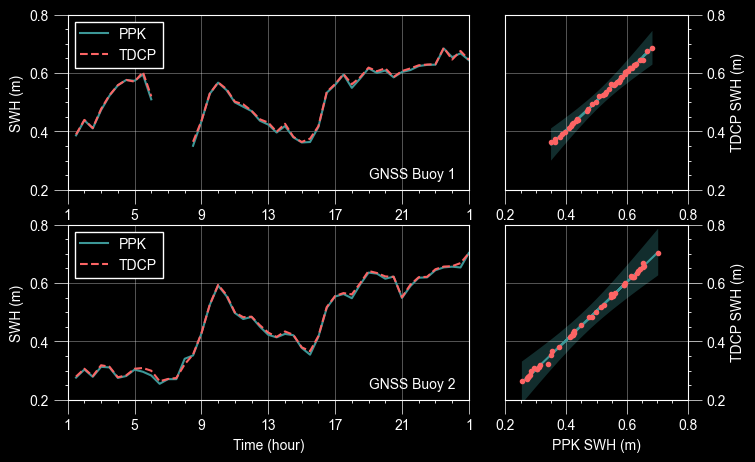

In [58]:
plt.figure(figsize=(8, 5))

plt.subplot(2, 3, (1, 2))
plt.plot(t2, fb1kw, '-', label='PPK')
plt.plot(t2, fb1tw, '--', label='TDCP')
plt.text(19, 0.24, 'GNSS Buoy 1')
plt.xlim(1, 25)
plt.ylim(0.2, 0.8)
plt.xticks(np.arange(1, 26, 4), labels=tk2)
plt.ylabel('SWH (m)')
plt.legend(framealpha=1)

ax2 = plt.subplot(2, 3, 3)
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
plt.plot(fb1kw, fest1, '-')
plt.plot(fb1kw, fb1tw, '.')
ix = np.argsort(fb1kw)
plt.fill_between(fb1kw[ix], (fest1-ferr1*2)[ix], (fest1+ferr1*2)[ix], alpha=0.3)
plt.xlim(0.2, 0.8)
plt.ylim(0.2, 0.8)
plt.ylabel('TDCP SWH (m)')

plt.subplot(2, 3, (4, 5))
plt.plot(t2, fb2kw, '-', label='PPK')
plt.plot(t2, fb2tw, '--', label='TDCP')
plt.text(19, 0.24, 'GNSS Buoy 2')
plt.xlim(1, 25)
plt.ylim(0.2, 0.8)
plt.xticks(np.arange(1, 26, 4), labels=tk2)
plt.xlabel('Time (hour)')
plt.ylabel('SWH (m)')
plt.legend(framealpha=1)

ax4 = plt.subplot(2, 3, 6)
ax4.yaxis.set_label_position("right")
ax4.yaxis.tick_right()
plt.plot(fb2kw, fest2, '-')
plt.plot(fb2kw, fb2tw, '.')
ix = np.argsort(fb2kw)
plt.fill_between(fb2kw[ix], (fest2-ferr2*2)[ix], (fest2+ferr2*2)[ix], alpha=0.3)
# plt.text(0.73, 0.23, '(d)')
plt.xlim(0.2, 0.8)
plt.ylim(0.2, 0.8)
plt.xlabel('PPK SWH (m)')
plt.ylabel('TDCP SWH (m)')

plt.savefig('../assets/fb1-fb2-ppk-tdcp-swh-reg.pdf', format='pdf', bbox_inches='tight')
plt.show()

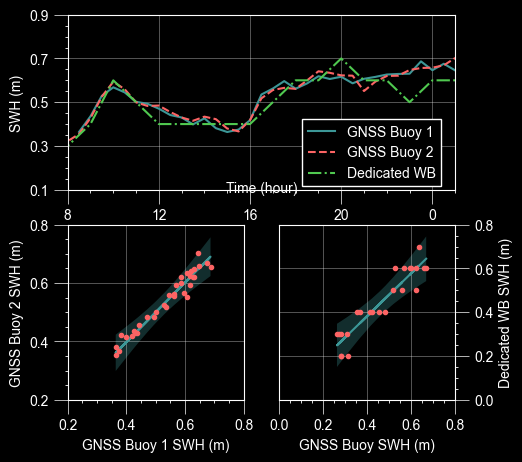

In [59]:
plt.figure(figsize=(5, 5))

plt.subplot(2, 2, (1, 2))
plt.plot(t2[14:], fb1tw[14:], '-', label='GNSS Buoy 1')
plt.plot(t2, fb2tw, '--', label='GNSS Buoy 2')
plt.plot(t3, sysw, '-.',  label='Dedicated WB')
plt.xlabel('Time (hour)', labelpad=-30)
plt.ylabel('SWH (m)')
plt.xticks(np.arange(8, 26, 4), labels=['8', '12', '16', '20', '0'])
plt.yticks(np.arange(0.1, 0.91, 0.2))
plt.xlim(8, 25)
plt.ylim(0.1, 0.9)
plt.legend(loc=[0.605, 0.02], framealpha=1)

plt.subplot(2, 2, 3)
plt.plot(fb1tw[11:], fest3, '-')
plt.plot(fb1tw[11:], fb2tw[11:], '.')
ix = np.argsort(fb1tw[11:])
plt.fill_between(fb1tw[11:][ix], (fest3-ferr3*2)[ix], (fest3+ferr3*2)[ix], alpha=0.3)
plt.xlim(0.2, 0.8)
plt.ylim(0.2, 0.8)
plt.xlabel('GNSS Buoy 1 SWH (m)')
plt.ylabel('GNSS Buoy 2 SWH (m)')

ax4 = plt.subplot(2, 2, 4)
ax4.yaxis.set_label_position("right")
ax4.yaxis.tick_right()
plt.plot(fb2tw[0::2], fest4, '-')
plt.plot(fb2tw[0::2], sysw[1:], '.')
ix = np.argsort(fb2tw[0::2])
plt.fill_between(fb2tw[0::2][ix], (fest4-ferr4*2)[ix], (fest4+ferr4*2)[ix], alpha=0.3)
plt.xlim(0, 0.8)
plt.ylim(0, 0.8)
plt.xlabel('GNSS Buoy SWH (m)')
plt.ylabel('Dedicated WB SWH (m)')

plt.savefig('../assets/fb1-fb2-dwb-swh-reg.pdf', format='pdf', bbox_inches='tight')
plt.show()

### Period

In [60]:
a5, b5 = np.polyfit(fb1tp[15:], fb2tp[15:], deg=1)
fest5 = a5 * fb1tp[15:] + b5
ferr5 = fb1tp[15:].std() * np.sqrt(1/len(fb1tp[15:]) +
                             (fb1tp[15:] - fb1tp[15:].mean())**2 / np.sum((fb1tp[15:] - fb1tp[15:].mean())**2))

In [61]:
a6, b6 = np.polyfit(fb2tp[16::2], sysp[9:], deg=1)
fest6 = a6 * fb2tp[16::2] + b6
ferr6 = fb2tp[16::2].std() * np.sqrt(1/len(fb2tp[16::2]) +
                             (fb2tp[16::2] - fb2tp[16::2].mean())**2 / np.sum((fb2tp[16::2] - fb2tp[16::2].mean())**2))

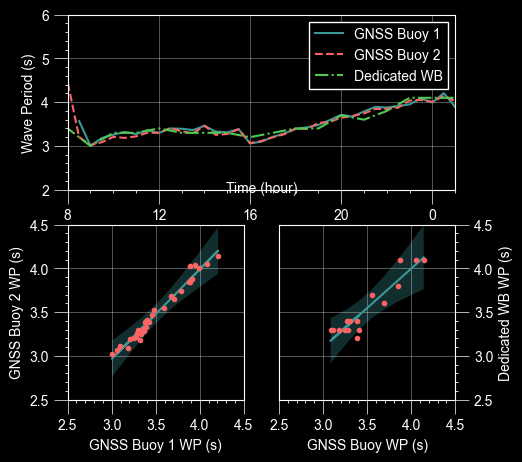

In [62]:
plt.figure(figsize=(5, 5))

plt.subplot(2, 2, (1, 2))
plt.plot(t2[14:], fb1tp[14:], '-', label='GNSS Buoy 1')
plt.plot(t2, fb2tp, '--', label='GNSS Buoy 2')
plt.plot(t3, sysp, '-.',  label='Dedicated WB')
# plt.text(24.2, 2.6, '(a)')
plt.xlabel('Time (hour)', labelpad=-30)
plt.ylabel('Wave Period (s)')
plt.xticks(np.arange(1, 26, 4), labels=tk2)
plt.xticks(np.arange(8, 26, 4), labels=['8', '12', '16', '20', '0'])
plt.xlim(8, 25)
plt.ylim(2, 6)
plt.legend(framealpha=1)

plt.subplot(2, 2, 3)
plt.plot(fb1tp[15:], fest5, '-')
plt.plot(fb1tp[15:], fb2tp[15:], '.')
ix = np.argsort(fb1tp[15:])
plt.fill_between(fb1tp[15:][ix], (fest5-ferr5*2)[ix], (fest5+ferr5*2)[ix], alpha=0.3)
plt.xlim(2.5, 4.5)
plt.ylim(2.5, 4.5)
plt.xlabel('GNSS Buoy 1 WP (s)')
plt.ylabel('GNSS Buoy 2 WP (s)')

ax4 = plt.subplot(2, 2, 4)
ax4.yaxis.set_label_position("right")
ax4.yaxis.tick_right()
plt.plot(fb2tp[16::2], fest6, '-')
plt.plot(fb2tp[16::2], sysp[9:], '.')
ix = np.argsort(fb2tp[16::2])
plt.fill_between(fb2tp[16::2][ix], (fest6-ferr6*2)[ix], (fest6+ferr6*2)[ix], alpha=0.3)
plt.xlim(2.5, 4.5)
plt.ylim(2.5, 4.5)
# plt.yticks(np.arange(2, 6))
plt.xlabel('GNSS Buoy WP (s)')
plt.ylabel('Dedicated WB WP (s)')

plt.savefig('../assets/fb1-fb2-dwb-wp-reg.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [63]:
a7, b7 = np.polyfit(fb1kp, fb1tp, deg=1)
fest7 = a7 * fb1kp + b7
ferr7 = fb1kp.std() * np.sqrt(1/len(fb1kp) +
                             (fb1kp - fb1kp.mean())**2 / np.sum((fb1kp - fb1kp.mean())**2))

In [64]:
a8, b8 = np.polyfit(fb2kp, fb2tp, deg=1)
fest8 = a8 * fb2kp + b8
ferr8 = fb2kp.std() * np.sqrt(1/len(fb2kp) +
                             (fb2kp - fb2kp.mean())**2 / np.sum((fb2kp - fb2kp.mean())**2))

In [65]:
fb1kp[10:14] = np.nan
fb1tp[10:14] = np.nan

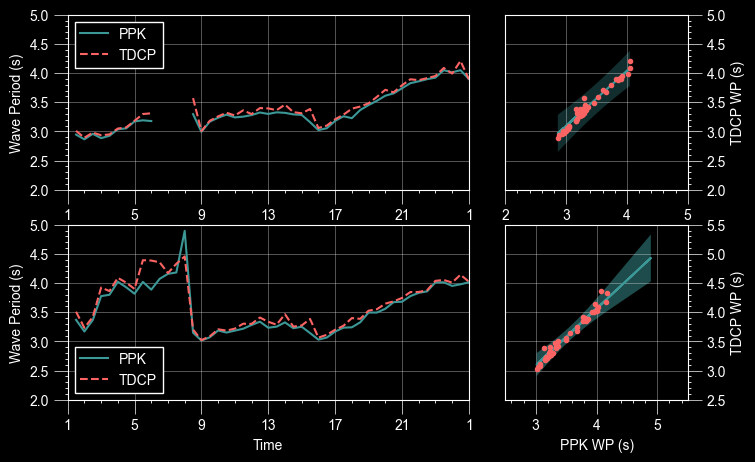

In [66]:
plt.figure(figsize=(8, 5))

plt.subplot(2, 3, (1, 2))
plt.plot(t2, fb1kp, '-', label='PPK')
plt.plot(t2, fb1tp, '--', label='TDCP')
# plt.text(23.7, 0.24, '(a)')
plt.xlim(1, 25)
plt.ylim(2, 5)
plt.xticks(np.arange(1, 26, 4), labels=tk2)
plt.ylabel('Wave Period (s)')
plt.legend(framealpha=1)

ax2 = plt.subplot(2, 3, 3)
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
plt.plot(fb1kp, fest7, '-')
plt.plot(fb1kp, fb1tp, '.')
ix = np.argsort(fb1kp)
plt.fill_between(fb1kp[ix], (fest7-ferr7*2)[ix], (fest7+ferr7*2)[ix], alpha=0.3)
plt.xlim(2, 5)
plt.ylim(2, 5)
plt.ylabel('TDCP WP (s)')

plt.subplot(2, 3, (4, 5))
plt.plot(t2, fb2kp, '-', label='PPK')
plt.plot(t2, fb2tp, '--', label='TDCP')
plt.xlim(1, 25)
plt.ylim(2, 5)
plt.xticks(np.arange(1, 26, 4), labels=tk2)
plt.xlabel('Time')
plt.ylabel('Wave Period (s)')
plt.legend(framealpha=1)

ax4 = plt.subplot(2, 3, 6)
ax4.yaxis.set_label_position("right")
ax4.yaxis.tick_right()
ix2 = np.array([ 0,  1,  2,  3,  4,  5,  6,  7, 10, 11, 12,14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])
plt.plot(fb2kp, fest8, '-')
plt.plot(fb2kp[ix2], fb2tp[ix2], '.')
ix = np.argsort(fb2kp)
plt.fill_between(fb2kp[ix], (fest8-ferr8*2)[ix], (fest8+ferr8*2)[ix], alpha=0.5)
plt.xlim(2.5, 5.5)
plt.ylim(2.5, 5.5)
plt.xlabel('PPK WP (s)')
plt.ylabel('TDCP WP (s)')

plt.savefig('../assets/fb1-fb2-ppk-tdcp-wp-reg.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [67]:
np.argmax(fb2kp), np.argmax(fb2tp[:13])

(13, 8)

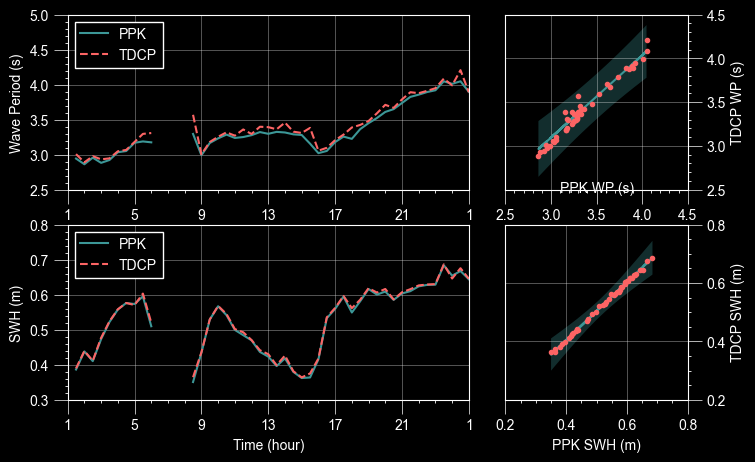

In [68]:
plt.figure(figsize=(8, 5))

plt.subplot(2, 3, (1, 2))
plt.plot(t2, fb1kp, '-', label='PPK')
plt.plot(t2, fb1tp, '--', label='TDCP')
# plt.text(19, 2.65, 'GNSS Buoy 1')
plt.xlim(1, 25)
plt.ylim(2.5, 5)
plt.xticks(np.arange(1, 26, 4), labels=tk2)
plt.ylabel('Wave Period (s)')
plt.legend(loc='upper left', framealpha=1)

ax2 = plt.subplot(2, 3, 3)
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
plt.plot(fb1kp, fest7, '-')
plt.plot(fb1kp, fb1tp, '.')
ix = np.argsort(fb1kp)
plt.fill_between(fb1kp[ix], (fest7-ferr7*2)[ix], (fest7+ferr7*2)[ix], alpha=0.3)
plt.xlim(2.5, 4.5)
plt.ylim(2.5, 4.5)
plt.xlabel('PPK WP (s)', labelpad=-30)
plt.ylabel('TDCP WP (s)')

plt.subplot(2, 3, (4, 5))
plt.plot(t2, fb1kw, '-', label='PPK')
plt.plot(t2, fb1tw, '--', label='TDCP')
# plt.text(19, 0.33, 'GNSS Buoy 1')
plt.xlim(1, 25)
plt.ylim(0.3, 0.8)
plt.xticks(np.arange(1, 26, 4), labels=tk2)
plt.xlabel('Time (hour)')
plt.ylabel('SWH (m)')
plt.legend(framealpha=1)

ax2 = plt.subplot(2, 3, 6)
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
plt.plot(fb1kw, fest1, '-')
plt.plot(fb1kw, fb1tw, '.')
ix = np.argsort(fb1kw)
plt.fill_between(fb1kw[ix], (fest1-ferr1*2)[ix], (fest1+ferr1*2)[ix], alpha=0.3)
plt.xlim(0.2, 0.8)
plt.ylim(0.2, 0.8)
plt.xlabel('PPK SWH (m)')
plt.ylabel('TDCP SWH (m)')

plt.savefig('../assets/fb1-ppk-tdcp-wp-swh-reg.pdf', format='pdf', bbox_inches='tight')
plt.show()

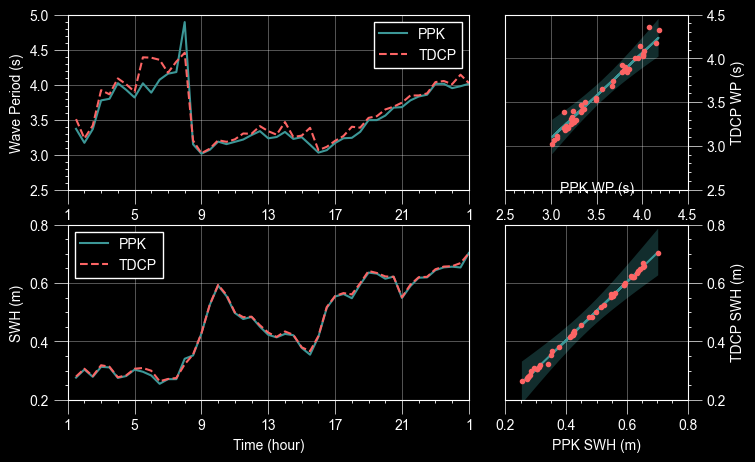

In [69]:
plt.figure(figsize=(8, 5))

plt.subplot(2, 3, (1, 2))
plt.plot(t2, fb2kp, '-', label='PPK')
plt.plot(t2, fb2tp, '--', label='TDCP')
# plt.text(19, 2.7, 'GNSS Buoy 2')
plt.xlim(1, 25)
plt.ylim(2.5, 5)
plt.xticks(np.arange(1, 26, 4), labels=tk2)
plt.ylabel('Wave Period (s)')
plt.legend(framealpha=1)

ax4 = plt.subplot(2, 3, 3)
ax4.yaxis.set_label_position("right")
ax4.yaxis.tick_right()
ix2 = np.array([ 0,  1,  2,  3,  4,  5,  6,  7, 10, 11, 12,14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])
plt.plot(fb2kp[ix2], fest8[ix2], '-')
plt.plot(fb2kp[ix2], fb2tp[ix2], '.')
ix = np.argsort(fb2kp[ix2])
plt.fill_between(fb2kp[ix2][ix], (fest8-ferr8*2)[ix2][ix], (fest8+ferr8*2)[ix2][ix], alpha=0.3)
plt.xlim(2.5, 4.5)
plt.ylim(2.5, 4.5)
plt.xlabel('PPK WP (s)', labelpad=-30)
plt.ylabel('TDCP WP (s)')

plt.subplot(2, 3, (4, 5))
plt.plot(t2, fb2kw, '-', label='PPK')
plt.plot(t2, fb2tw, '--', label='TDCP')
# plt.text(19, 0.24, 'GNSS Buoy 2')
plt.xlim(1, 25)
plt.ylim(0.2, 0.8)
plt.xticks(np.arange(1, 26, 4), labels=tk2)
plt.xlabel('Time (hour)')
plt.ylabel('SWH (m)')
plt.legend(framealpha=1)

ax4 = plt.subplot(2, 3, 6)
ax4.yaxis.set_label_position("right")
ax4.yaxis.tick_right()
plt.plot(fb2kw, fest2, '-')
plt.plot(fb2kw, fb2tw, '.')
ix = np.argsort(fb2kw)
plt.fill_between(fb2kw[ix], (fest2-ferr2*2)[ix], (fest2+ferr2*2)[ix], alpha=0.3)
# plt.text(0.73, 0.23, '(d)')
plt.xlim(0.2, 0.8)
plt.ylim(0.2, 0.8)
plt.xlabel('PPK SWH (m)')
plt.ylabel('TDCP SWH (m)')

plt.savefig('../assets/fb2-ppk-tdcp-wp-swh-reg.pdf', format='pdf', bbox_inches='tight')
plt.show()